# Active Learning for Single Classifers
The notebook presents results of active learning for classifiers built on single predicates.<br>
As a classifier, we used Linear SVM with standard settings provided by scikit-learn, namely penalty=’l2’,  loss=’squared_hinge’, C=1.0, random_state=123,  and class_weight='balanced' (to take into account unbalanced property of the data).


For handling unbalanced data, the undersampling of a majority class used. The lower bound of the proportion of positive class is set to 0.333. The x-axis is the "number of queried items". Note that this might not be the same as the number of training items since we want to keep the minimal proportion of positive items and therefore might not include some labeled items to the training set.

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
def plot_charts(df, metrics, algos, pred):
    fig, ax = plt.subplots(nrows=1, ncols=3, gridspec_kw = {'width_ratios':[1, 1, 1]}, figsize=(20,6))
    x = df.loc[df['sampling_strategy'] == algos[0]]['num_items_queried'].values
    for i in [0, 1, 2]:
        for alg, c, l in zip(algos, ['blue', 'black'], ['-', '--']):
            y = df.loc[df['sampling_strategy'] == alg][metrics[i]+'_mean'].values
            y_std = df.loc[df['sampling_strategy'] == alg][metrics[i]+'_std'].values
            ax[i].plot(x, y, label=alg, color=c, linestyle=l)
            ax[i].fill_between(x, y-y_std, y+y_std, alpha=0.07, color=c)
            ax[i].set_xlabel('number of queried items', size=14)
            ax[i].set_ylabel(metrics[i], size=14)
            ax[i].legend(loc='lower right', fontsize=14)
            ax[i].set_title('{} on predicate {}'.format(metrics[i], pred), size=15)

## Predicate C04: Neoplasms 
Selectivity of (C04): 0.18

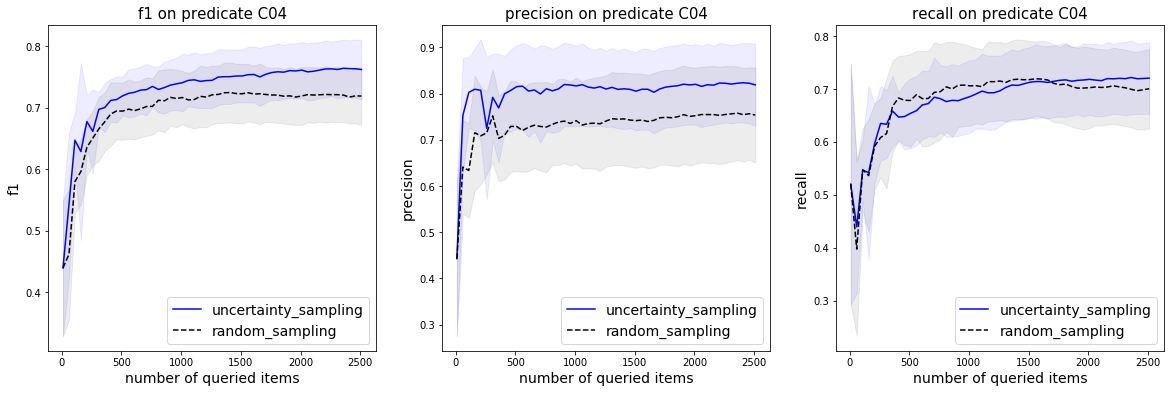

In [3]:
plot_charts(pd.read_csv('../data/single_classifier_al/al_C04.csv'), ['f1', 'precision', 'recall'], ['uncertainty_sampling', 'random_sampling'], 'C04')

## Predicate C10: Nervous System Diseases
Selectivity of (C10): 0.11

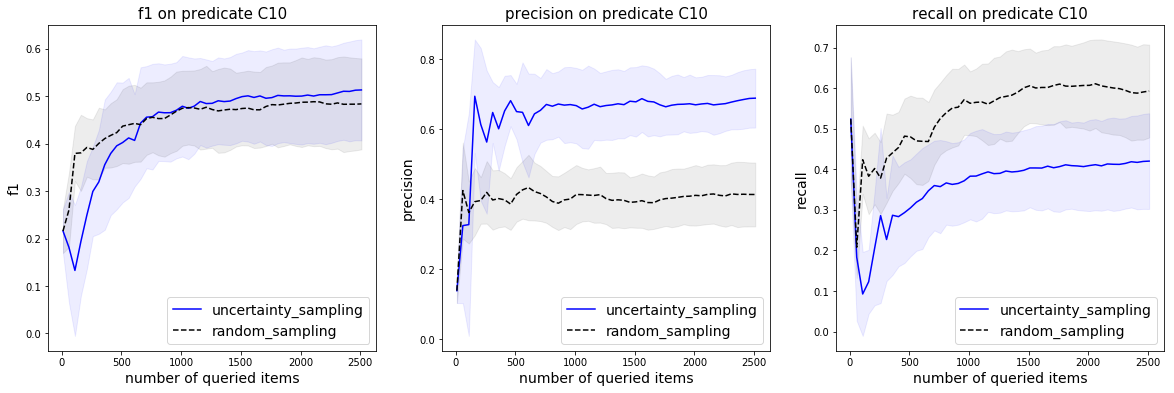

In [4]:
plot_charts(pd.read_csv('../data/single_classifier_al/al_C10.csv'), ['f1', 'precision', 'recall'], ['uncertainty_sampling', 'random_sampling'], 'C10')

## Predicate C12: Urologic and Male Genital Diseases
Selectivity of (C12): 0.07

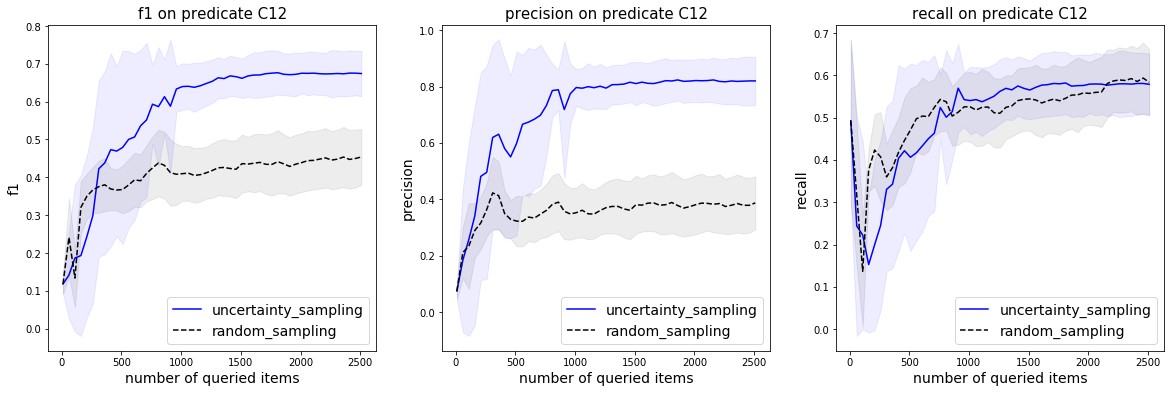

In [5]:
plot_charts(pd.read_csv('../data/single_classifier_al/al_C12.csv'), ['f1', 'precision', 'recall'], ['uncertainty_sampling', 'random_sampling'], 'C12')

## Predicate C14: Cardiovascular Diseases
Selectivity of (C14): 0.18

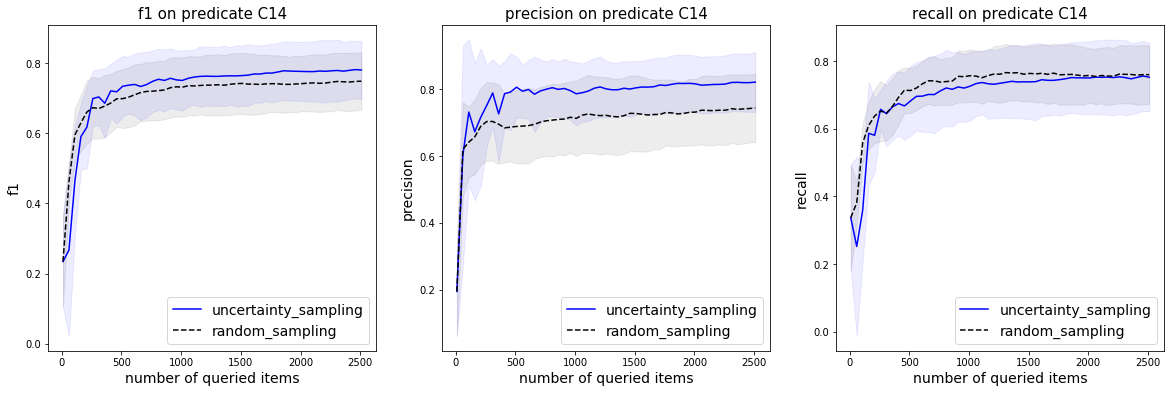

In [6]:
plot_charts(pd.read_csv('../data/single_classifier_al/al_C14.csv'), ['f1', 'precision', 'recall'], ['uncertainty_sampling', 'random_sampling'], 'C14')

## Predicate C23: Pathological Conditions, Signs and Symptoms
Selectivity of (C23): 0.28

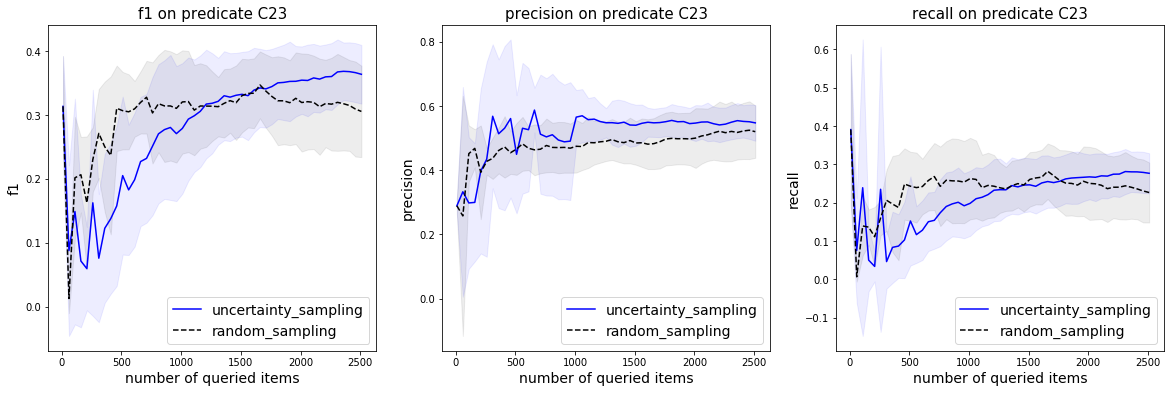

In [7]:
plot_charts(pd.read_csv('../data/single_classifier_al/al_C23.csv'), ['f1', 'precision', 'recall'], ['uncertainty_sampling', 'random_sampling'], 'C23')